# Homework 5

### Name : Anushka Kamath
### Github Username : anushkakamath
### USC email id : arkamath@usc.edu
### USC ID : 9418501008

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import xgboost as xg
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


# 1. Decision Trees as Interpretable Models
1. (a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ ml/datasets/Acute+Inflammations.


reading .data file : https://stackoverflow.com/questions/62435218/how-to-read-the-dataset-data-and-names-directly-into-python-dataframe-from-u  
encoding utf-8 error : https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python  
reading tab seperated data : https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas  
replacing comma with dot : https://stackoverflow.com/questions/40083266/replace-comma-with-dot-pandas  
changing columns from str to binary due to (could not convert string to float: 'no') error: https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe  
hide warnings : https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
skip first entry of list here col1 as it has it is int : https://stackoverflow.com/questions/10079216/skip-first-entry-in-for-loop-in-python  
Scikit learn decision tree : https://scikit-learn.org/stable/modules/tree.html  
https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d

https://towardsdatascience.com/decision-tree-classifier-and-cost-computation-pruning-using-python-b93a0985ea77  
https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d

a1 Temperature of patient { 35C-42C }  
a2 Occurrence of nausea { yes, no }  
a3 Lumbar pain { yes, no }  
a4 Urine pushing (continuous need for urination) { yes, no }  
a5 Micturition pains { yes, no }  
a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }  
d1 decision: Inflammation of urinary bladder { yes, no }  
d2 decision: Nephritis of renal pelvis origin   

In [2]:
column_names = ["Patient Temperature", "Nausea", "Lumbar Pain", "Urine pushing", "Micturition pains", "Urethra Burns", "Decision1", "Decision2"]
df = pd.read_csv("../data/diagnosis.data", names = column_names, encoding='utf-16', delimiter="\t")
df = df.apply(lambda x: x.str.replace(',','.'))
for column in column_names[1:]:
    df[column] = df[column].apply(lambda x: 0 if x=='no' else 1)
df


,Patient Temperature,Nausea,Lumbar Pain,Urine pushing,Micturition pains,Urethra Burns,Decision1,Decision2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


1. (b) Build a decision tree on the whole data set and plot it.

[Text(0.4, 0.9, 'Patient Temperature <= 37.95\nentropy = 0.99\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\nentropy = 0.459\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'Lumbar Pain <= 0.5\nentropy = 0.775\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'Micturition pains <= 0.5\nentropy = 0.479\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\nentropy = 0.465\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

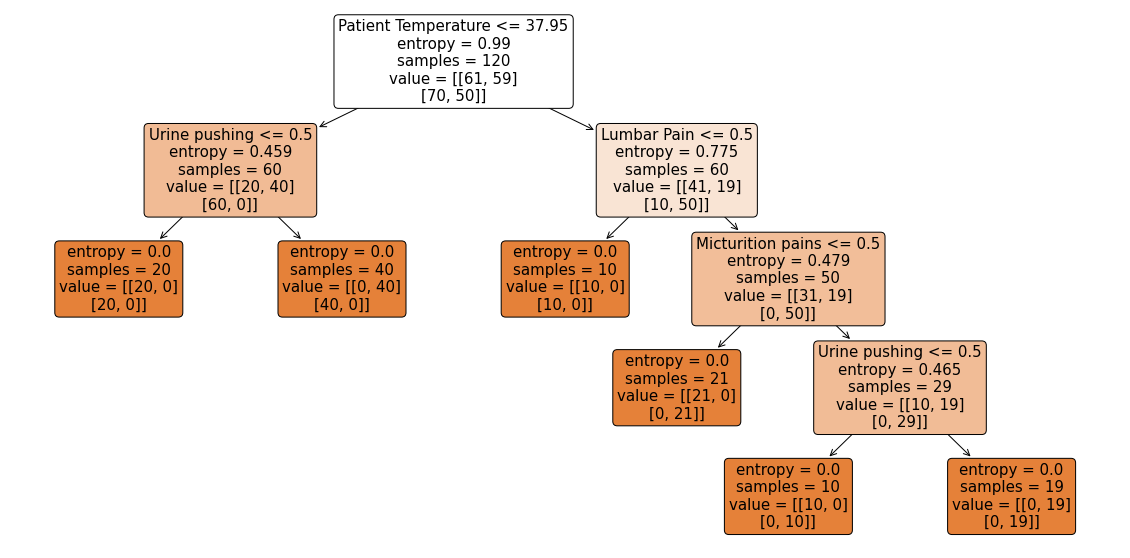

In [3]:
X = df.iloc[:, :-2]
Y = df.iloc[:, -2:]
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, Y)
feature_names = X.columns
labels = Y.Decision1
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names = feature_names, class_names = labels, rounded = True, filled = True, fontsize=15)

1. (c) Convert the decision rules into a set of IF-THEN rules

https://mljar.com/blog/extract-rules-decision-tree/  

In [4]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "----" * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
tree_to_code(clf, df.columns)

def predict(Patient Temperature, Nausea, Lumbar Pain, Urine pushing, Micturition pains, Urethra Burns, Decision1, Decision2):
----if Patient Temperature <= 37.95:
--------if Urine pushing <= 0.5:
------------return [[20.  0.]
 [20.  0.]]
--------else:  # if Urine pushing > 0.5
------------return [[ 0. 40.]
 [40.  0.]]
----else:  # if Patient Temperature > 37.95
--------if Lumbar Pain <= 0.5:
------------return [[10.  0.]
 [10.  0.]]
--------else:  # if Lumbar Pain > 0.5
------------if Micturition pains <= 0.5:
----------------return [[21.  0.]
 [ 0. 21.]]
------------else:  # if Micturition pains > 0.5
----------------if Urine pushing <= 0.5:
--------------------return [[10.  0.]
 [ 0. 10.]]
----------------else:  # if Urine pushing > 0.5
--------------------return [[ 0. 19.]
 [ 0. 19.]]


1. (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
classifier = DecisionTreeClassifier()
classifier.fit(X_train , y_train)
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alpha
    )
)

[0.         0.05333333 0.07678487 0.11162791 0.20134031]
Number of nodes in the last tree is: 11 with ccp_alpha: 0.0
Number of nodes in the last tree is: 7 with ccp_alpha: 0.05333333333333333
Number of nodes in the last tree is: 5 with ccp_alpha: 0.07678486997635933
Number of nodes in the last tree is: 3 with ccp_alpha: 0.11162790697674418
Number of nodes in the last tree is: 1 with ccp_alpha: 0.20134030946664955


[Text(0.4, 0.9, 'Patient Temperature <= 37.95\ngini = 0.496\nsamples = 90\nvalue = [[47, 43]\n[50, 40]]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\ngini = 0.234\nsamples = 43\nvalue = [[16, 27]\n[43, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [[16, 0]\n[16, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [[0, 27]\n[27, 0]]'),
 Text(0.6, 0.7, 'Lumbar Pain <= 0.5\ngini = 0.351\nsamples = 47\nvalue = [[31, 16]\n[7, 40]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[7, 0]]'),
 Text(0.7, 0.5, 'Micturition pains <= 0.5\ngini = 0.24\nsamples = 40\nvalue = [[24, 16]\n[0, 40]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [[16, 0]\n[0, 16]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\ngini = 0.222\nsamples = 24\nvalue = [[8, 16]\n[0, 24]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [[8, 0]\n[0, 8]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [[0, 16]\n[0, 16]]')]

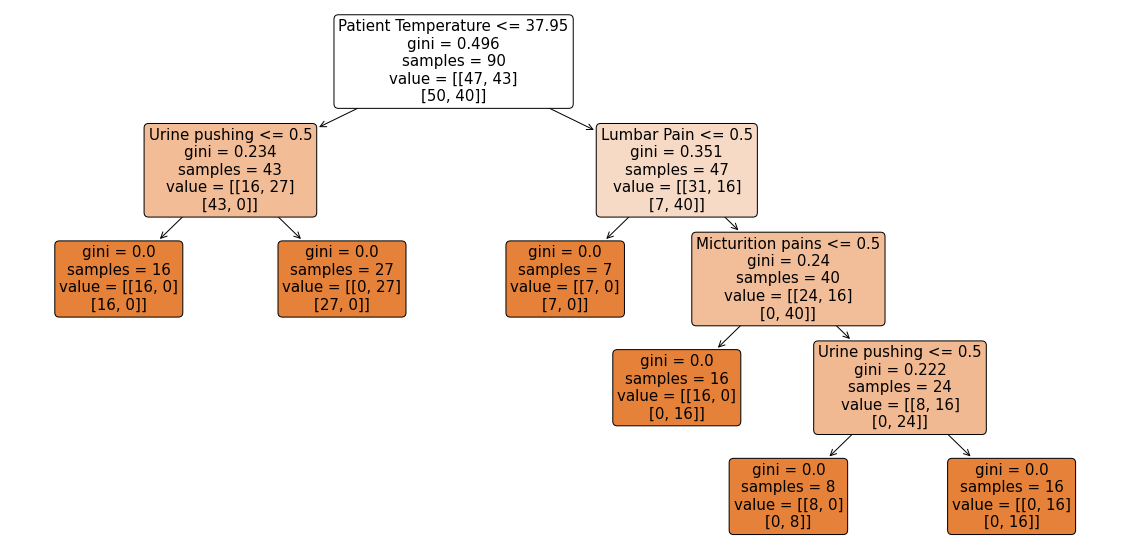

In [6]:
classifier1 = DecisionTreeClassifier(ccp_alpha = 0)
classifier1.fit(X_train , y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(classifier1, feature_names = feature_names, class_names = labels, rounded = True, filled = True, fontsize=15)


# 2. The LASSO and Boosting for Regression
(a) Download the Communities and Crime data3 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas  
https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
https://datatofish.com/numpy-array-to-pandas-dataframe/

Impute missing values - https://scikit-learn.org/stable/modules/impute.html


In [7]:
header = pd.read_csv("../data/communities.names", usecols = [0])
header = header.iloc[56:184].reset_index(drop=True)
header = header.set_axis(['Name'], axis=1, inplace=False)
header = header['Name'].str.split(" ", n = 2, expand = True)
data = pd.read_csv("../data/communities.data", names = header[1])
#data

(b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

non predictive features as per communities.names are - state, county, community, communityname, fold
These columns are dropped
https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe  
https://stackoverflow.com/questions/29586323/how-to-retain-column-headers-of-data-frame-after-pre-processing-in-scikit-learn


In [8]:
data.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1, inplace=True)
train_df = data.iloc[:1495]
test_df = data.iloc[1495:]
test_df = test_df.reset_index(drop=True)
train_df = train_df.replace('?', np.nan)
test_df = test_df.replace('?', np.nan)

In [9]:
impute = SimpleImputer(missing_values=np.nan, strategy='median')
impute.fit(train_df)
# columns = X_train.columns
train_df = pd.DataFrame(impute.transform(train_df), columns = train_df.columns)
test_df = pd.DataFrame(impute.transform(test_df), columns = test_df.columns)
print("Missing values imputed train dataset : ")
print(train_df)
print("Missing values imputed test dataset : ")
print(test_df)

Missing values imputed train dataset : 
      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  age

(c) Plot a correlation matrix for the features in the data set

https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas  
https://www.geeksforgeeks.org/how-to-set-a-seaborn-chart-figure-size/

FOR TRAIN DATA


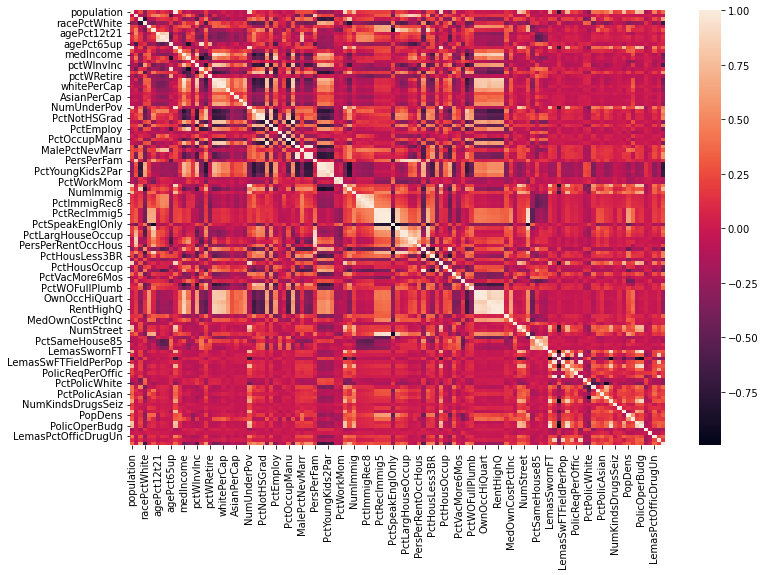

In [10]:
print("FOR TRAIN DATA")
corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix)
plt.show()

FOR TEST DATA


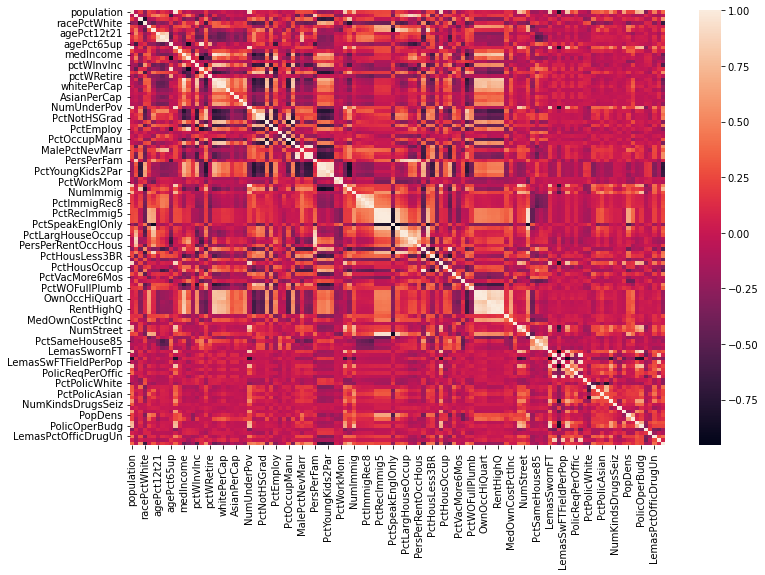

In [11]:
print("FOR TEST DATA")
corr_matrix = test_df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix)
plt.show()

(d) Calculate the Coefficient of Variation CV for each feature, where CV = ms , in
which s is sample standard deviation and m is sample mean.

https://www.statology.org/coefficient-of-variation-in-python/  
https://statisticsbyjim.com/basics/coefficient-variation/

In [12]:
X_train = train_df.iloc[:,:122]
y_train = train_df.iloc[:,122]
X_test = test_df.iloc[:,:122]
y_test = test_df.iloc[:,122]

In [13]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
cv_xtrain = pd.DataFrame(X_train.apply(cv))
cv_xtrain = cv_xtrain.set_axis(['CV for X Train Features'], axis=1, inplace=False)
cv_xtrain

,CV for X Train Features
population,2.241105
householdsize,0.355800
racepctblack,1.428885
racePctWhite,0.330213
racePctAsian,1.359100
...,...
PolicOperBudg,1.645508
LemasPctPolicOnPatr,0.112032
LemasGangUnitDeploy,0.335104
LemasPctOfficDrugUn,2.552946


(e) Pick sqrt( ⌋128⌋ ) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

https://stackoverflow.com/questions/18358938/get-row-index-values-of-pandas-dataframe-as-list  
https://stackoverflow.com/questions/41825978/sorting-columns-and-selecting-top-n-rows-in-each-group-pandas-dataframe

In [14]:
cv_range = math.floor(math.sqrt(128))
cv_range

11

                     CV for X Train Features
PctPolicAsian                       5.527059
NumStreet                           4.292923
NumInShelters                       3.470952
NumIlleg                            3.058964
NumImmig                            2.926635
LemasPctOfficDrugUn                 2.552946
NumUnderPov                         2.342443
LemasSwornFT                        2.248042
population                          2.241105
numbUrban                           2.038461
HousVacant                          1.968467


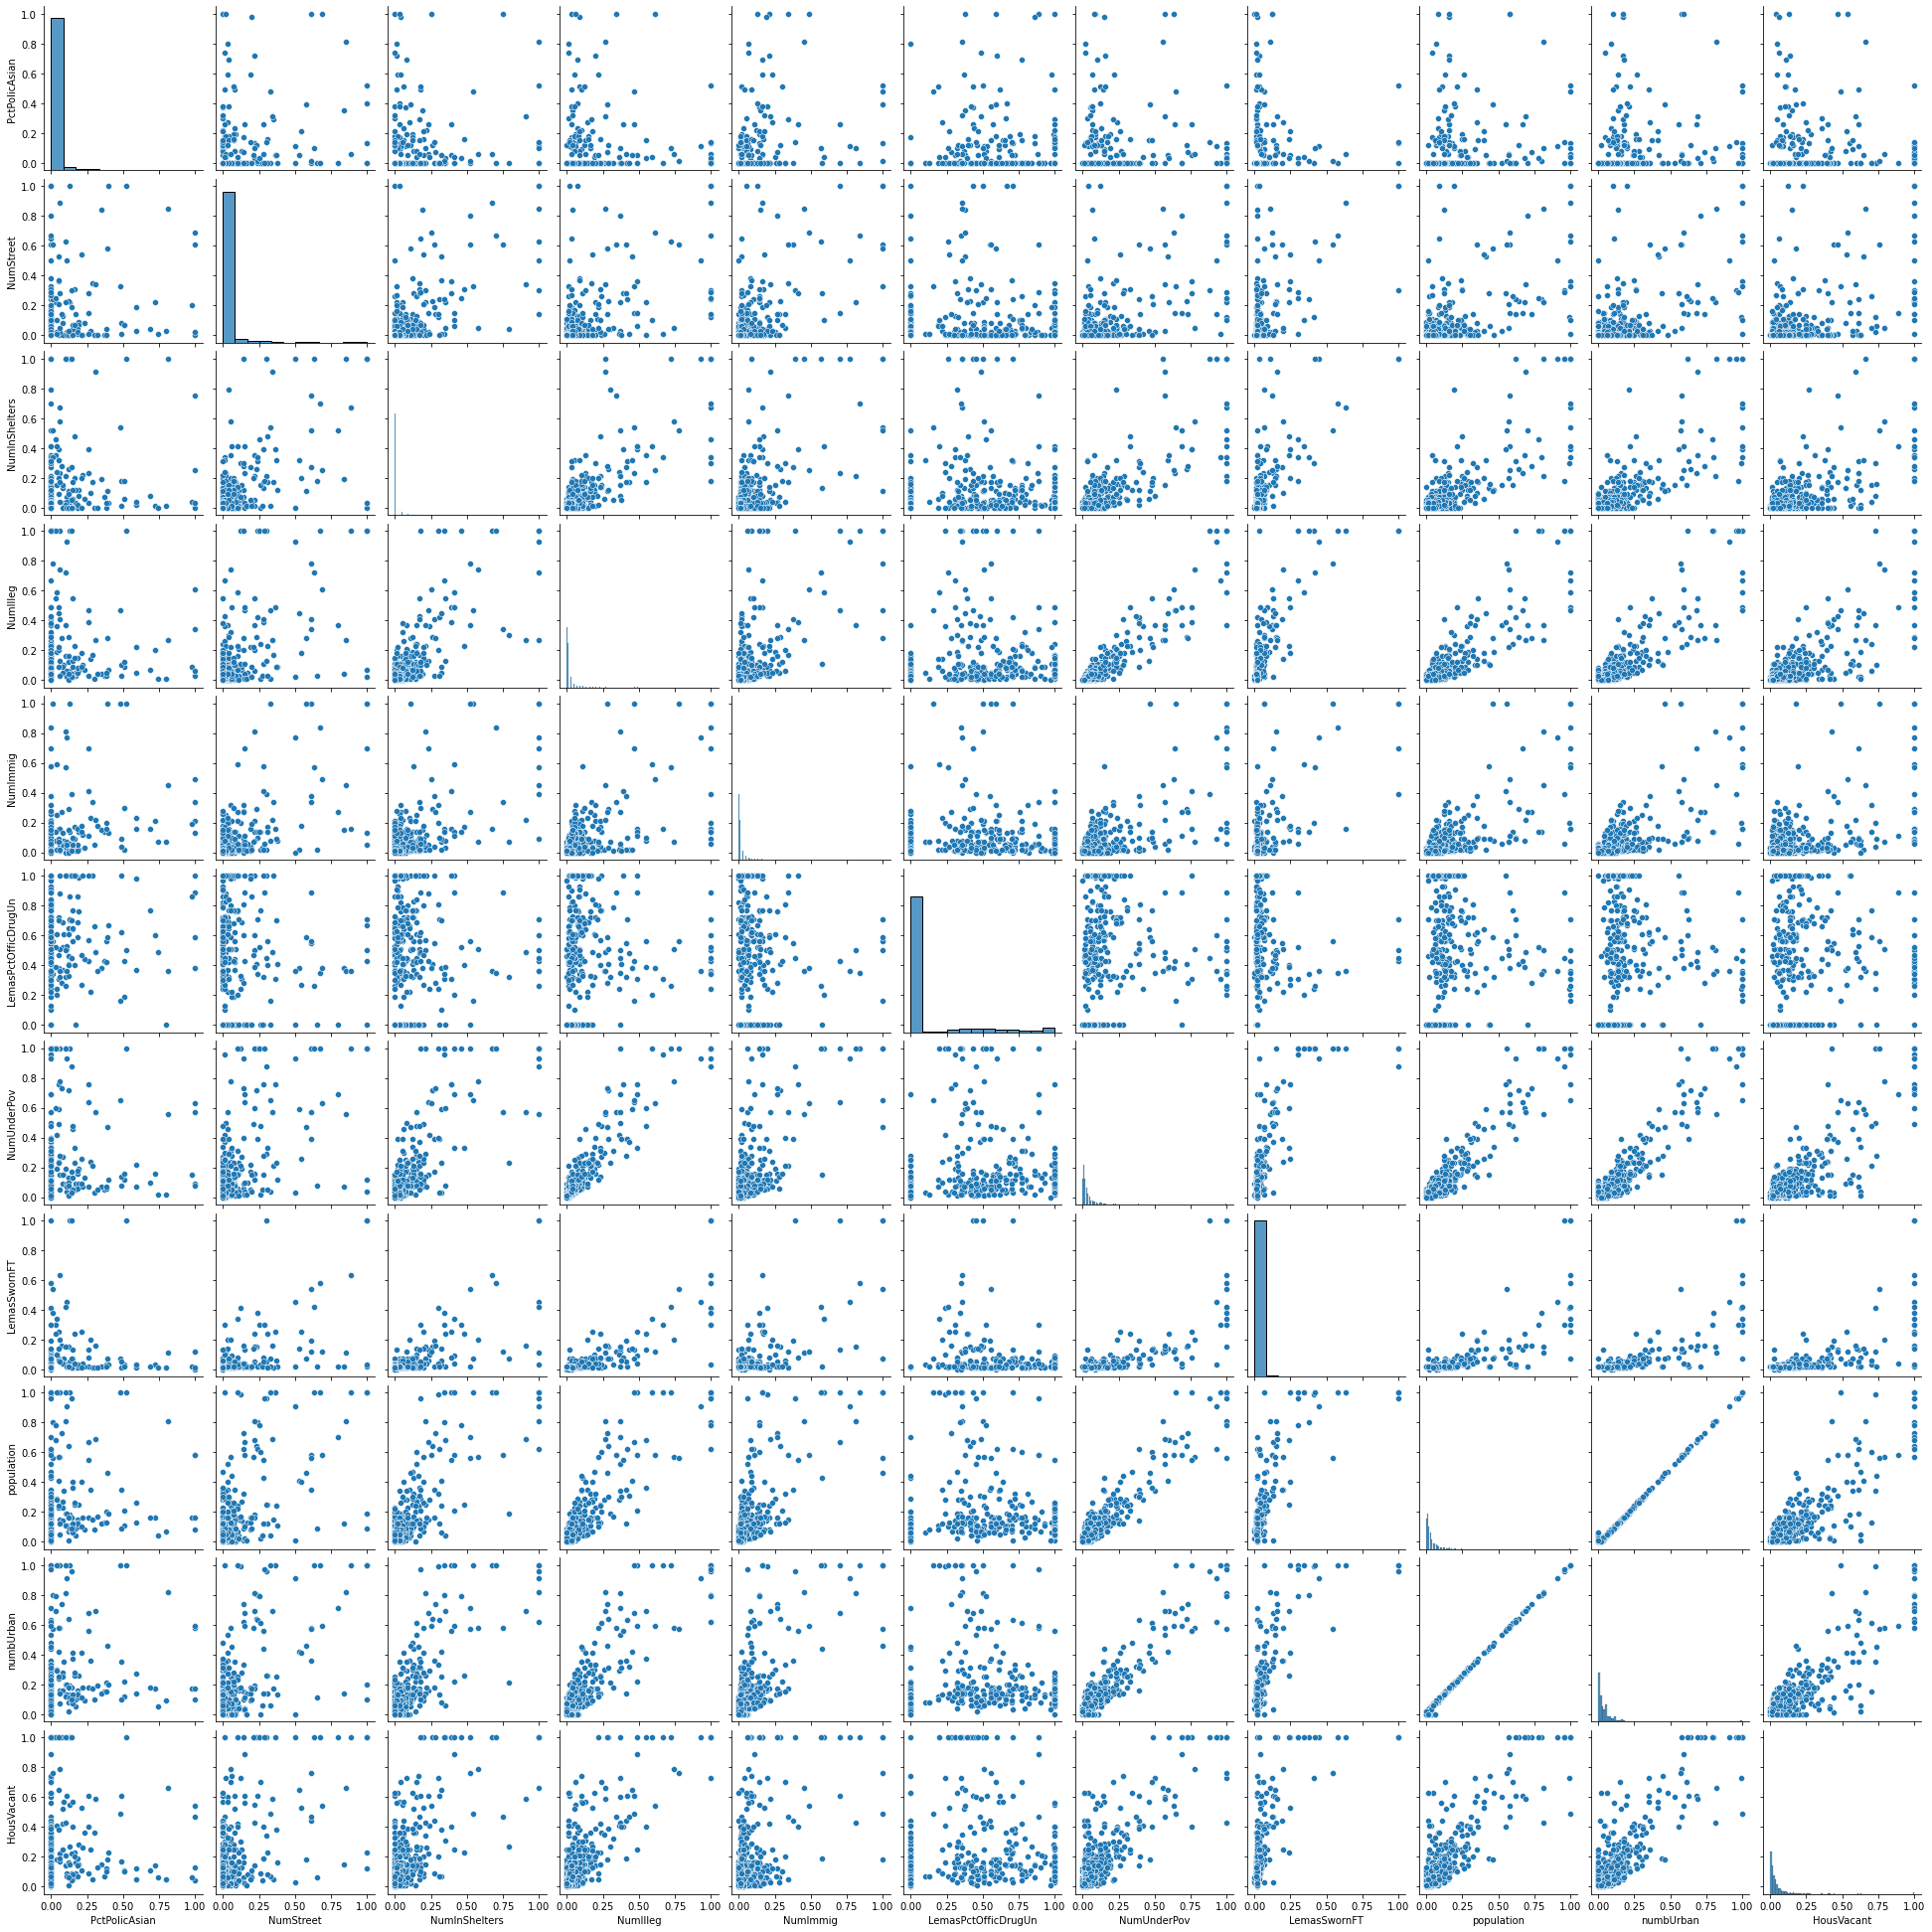

In [15]:
df1 = cv_xtrain.sort_values('CV for X Train Features',ascending = False).head(cv_range)
print(df1)
plot = train_df[list(df1.index.values)]
#print(plot)
sns.pairplot(plot)
plt.show()

<AxesSubplot:>

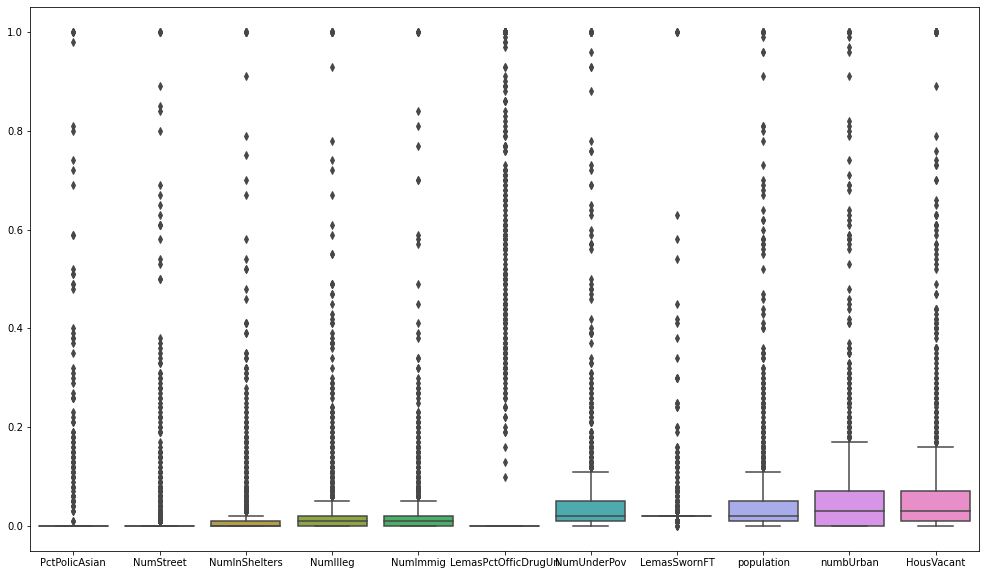

In [16]:
plt.figure(figsize = (17,10))
sns.boxplot(data = plot)

Significance of features are as follows:  
From my observation, it is seem that features are almost linear. Few of the features appear to be correlated.
Boxplot denotes variables have low mean , high variance.   
It is not simple to conclude inferences about the significance of these features from the scatter plot alone.

(f) Fit a linear model using least squares to the training set and report the test error.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html  
https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

In [17]:
lr_model = LinearRegression()
fit1 = lr_model.fit(X_train, y_train)
y_pred = fit1.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)

print("Test error by least squares (MSE) for Linear Regression is = ", mse_lr)

Test error by least squares (MSE) for Linear Regression is =  1.766504375344183e+17


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

In [18]:
# ridge_model = RidgeCV()
# fit2 = ridge_model.fit(X_train, y_train)
# y_pred = fit2.predict(X_test)
# mse_ridge = mean_squared_error(y_test, y_pred)
# print("Test error by least squares (MSE) for Ridge Regression is  = ", mse_ridge)

In [19]:
lamda = 10 ** np.linspace(10,-1,100) * 0.5
ridge_model = RidgeCV(alphas=lamda)
fit2 = ridge_model.fit(X_train, y_train)
y_pred = fit2.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print("The lambda obtained by cross validation = ", ridge_model.alpha_)
print("Test error by least squares (MSE) for Ridge Regression is  = ", mse_ridge)

The lambda obtained by cross validation =  2.320794416806396
Test error by least squares (MSE) for Ridge Regression is  =  0.017515674376304708


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized4 features. Report the test error for both cases and compare them.


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

In [20]:
# lasso = LassoCV(cv=5, random_state=0,normalize=False)
lasso_model = LassoCV(cv=5)
fit3 = lasso_model.fit(X_train, y_train)
y_pred = fit3.predict(X_test)
mse_lasso = metrics.mean_squared_error(y_test, y_pred)
print("Test error by least squares (MSE) for Lasso Regression is  =  ", mse_lasso)

important_feat = fit3.coef_
features1 = np.array(X_train.columns)[important_feat != 0]
print("The lambda obtained by cross validation = ", lasso_model.alpha_)
print(len(features1))
print(features1)

Test error by least squares (MSE) for Lasso Regression is  =   0.017617760569778627
The lambda obtained by cross validation =  0.00012454087437758504
74
['racepctblack' 'racePctAsian' 'agePct12t21' 'agePct12t29' 'pctUrban'
 'pctWWage' 'pctWFarmSelf' 'pctWInvInc' 'pctWSocSec' 'pctWPubAsst'
 'pctWRetire' 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap'
 'OtherPerCap' 'HispPerCap' 'PctPopUnderPov' 'PctLess9thGrade' 'PctEmploy'
 'PctEmplManu' 'PctOccupManu' 'MalePctDivorce' 'MalePctNevMarr'
 'FemalePctDiv' 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par'
 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig' 'PctImmigRecent'
 'PctImmigRec10' 'PctRecImmig10' 'PctNotSpeakEnglWell' 'PctLargHouseOccup'
 'PersPerOccupHous' 'PctPersOwnOccup' 'PctPersDenseHous' 'PctHousLess3BR'
 'MedNumBR' 'HousVacant' 'PctHousOccup' 'PctVacantBoarded'
 'PctVacMore6Mos' 'MedYrHousBuilt' 'PctHousNoPhone' 'PctWOFullPlumb'
 'OwnOccLowQuart' 'RentLowQ' 'MedRent' 'MedRentPctHousInc'
 'MedOwnCostPctInc' 'MedOwnCostPctInc

In [21]:
stdscl = StandardScaler()
stdscl.fit(X_train)
X_train_std = pd.DataFrame(stdscl.transform(X_train),columns= X_train.columns)
X_test_std = pd.DataFrame(stdscl.transform(X_test),columns= X_test.columns)
lasso_model_std = LassoCV(cv=5)
fit4 = lasso_model_std.fit(X_train_std, y_train)
y_pred = fit4.predict(X_test_std)
mse_ridge_std = mean_squared_error(y_test, y_pred)
print("Test error by least squares (MSE) for Standardized Lasso Regression is  =  ", mse_ridge_std)
print("The lambda obtained by cross validation = ", lasso_model_std.alpha_)

important_feat_std = fit4.coef_
features2 = np.array(X_train.columns)[important_feat_std != 0]
print(len(features2))
print(features2)

Test error by least squares (MSE) for Standardized Lasso Regression is  =   0.01768200098674982
The lambda obtained by cross validation =  0.0007630833878262516
72
['racepctblack' 'racePctAsian' 'agePct12t21' 'agePct12t29' 'pctUrban'
 'pctWWage' 'pctWFarmSelf' 'pctWInvInc' 'pctWSocSec' 'pctWPubAsst'
 'pctWRetire' 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap'
 'OtherPerCap' 'HispPerCap' 'PctPopUnderPov' 'PctLess9thGrade' 'PctEmploy'
 'PctEmplManu' 'MalePctDivorce' 'MalePctNevMarr' 'FemalePctDiv'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'PctWorkMom' 'NumIlleg'
 'PctIlleg' 'NumImmig' 'PctImmigRec5' 'PctImmigRec10' 'PctRecImmig10'
 'PctNotSpeakEnglWell' 'PctLargHouseOccup' 'PersPerOccupHous'
 'PctPersOwnOccup' 'PctPersDenseHous' 'PctHousLess3BR' 'HousVacant'
 'PctHousOccup' 'PctVacantBoarded' 'PctVacMore6Mos' 'MedYrHousBuilt'
 'PctHousNoPhone' 'PctWOFullPlumb' 'RentLowQ' 'MedRent'
 'MedRentPctHousInc' 'MedOwnCostPctInc' 'MedOwnCostPctIncNoMtg'
 'NumInShelters' 'NumStreet'

The Standardized and non-Standardized features do not have much difference. ???

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  
https://nirpyresearch.com/principal-component-regression-python/


In [22]:
total_error = []
m_list = []
for m in range(1, len(train_df.columns)):
    error = 0
    k_fold = KFold(n_splits=5)
    for a,b in (k_fold.split(train_df)):
        X_train1 = X_train.iloc[a,:]
        X_test1 = X_train.iloc[b,:]
        y_train1 = y_train.iloc[a]
        y_test1 = y_train.iloc[b]
        
        pca = PCA(n_components = m)
        pca.fit(X_train1)
        
        X_train_pca = pca.transform(X_train1)
        X_test_pca = pca.transform(X_test1)

        lin_model = LinearRegression()
        fit5 = lin_model.fit(X_train_pca, y_train1)
        y_pred = fit5.predict(X_test_pca)
        error = error + metrics.mean_squared_error(y_test1, y_pred)
        
    total_error.append(error/5)
    m_list.append(m)
#print(total_error)

In [23]:
print("The min training error is = ",min(total_error))
ideal_m = m_list[total_error.index(min(total_error))] 
print("The min training error is at m = ", ideal_m)

The min training error is =  0.019380882389043386
The min training error is at m =  96


In [24]:
pcr_model = make_pipeline(PCA(n_components=ideal_m), LinearRegression())
fit6 = pcr_model.fit(X_train, y_train)
y_pred = fit6.predict(X_test)
mse_pcr = mean_squared_error(y_test, y_pred)
print("Test error by least squares (MSE) for PCR is = ", mse_pcr)
print("The least test error for PCR is at m = ", ideal_m)

Test error by least squares (MSE) for PCR is =  0.01833982591933
The least test error for PCR is at m =  96


(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation.

https://www.geeksforgeeks.org/xgboost-for-regression/  
https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook  
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [30]:
alpha_list = 10 ** np.linspace(10,-1,100) * 0.5
error_list = []
alpha_all = []

for i in alpha_list:
    xg_model = xg.XGBRegressor(alpha = i, objective="reg:squarederror")
    k_fold = KFold(n_splits=5)
    scores = cross_val_score(xg_model, X_train, y_train, cv=k_fold)
    error_list.append(abs(scores.mean()))
    alpha_all.append(i)

In [31]:
alpha = alpha_all[error_list.index(min(error_list))]
print("Alpha obtained by cross validation = ", alpha)

Alpha obtained by cross validation =  179.69068319023165


In [32]:
xg_model = xg.XGBRegressor(alpha = alpha, objective="reg:squarederror")
fit7 = xg_model.fit(X_train, y_train)
y_pred = fit7.predict(X_test)
mse_xg = mean_squared_error(y_test, y_pred)
print("Test error by least squares (MSE) for XGBoost is = ", mse_xg)
print("The least test error for XGBoost is at alpha = ", alpha_min)

Test error by least squares (MSE) for XGBoost is =  0.044209980048228875
The least test error for XGBoost is at alpha =  179.69068319023165


In [28]:
# xg_model = xg.XGBRegressor()
# fit6 = xg_model.fit(X_train, y_train)
# y_pred = fit6.predict(X_test)
# mse_xg = metrics.mean_squared_error(y_test, y_pred)
# print("Test error by least squares (MSE) for XGBoost = " , mse_xg)
# def display_scores(scores):
#     print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
# scores = cross_val_score(xg_model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
# display_scores(np.sqrt(-scores))